In [1]:
import pandas as pd
from stock import Stock, MA_pair

# importing matplotlib module 
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3

In [4]:
bot = Stock('MSFT',time_period='5y')
bot.stock_data

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2017-06-05,67.410979,68.272699,67.261111,67.701340,33316800,0.0,0
1,1,2017-06-06,67.720090,68.019819,67.691984,67.926147,31511100,0.0,0
2,2,2017-06-07,68.038538,68.160301,67.392245,67.804375,22301800,0.0,0
3,3,2017-06-08,67.916773,67.926135,66.970751,67.392242,24588300,0.0,0
4,4,2017-06-09,67.476539,67.514006,64.245080,65.865494,49187400,0.0,0
...,...,...,...,...,...,...,...,...,...
1255,1255,2022-05-27,268.480011,273.339996,267.559998,273.239990,26910800,0.0,0
1256,1256,2022-05-31,272.529999,274.769989,268.929993,271.869995,37827700,0.0,0
1257,1257,2022-06-01,275.200012,277.690002,270.040009,272.420013,25292200,0.0,0
1258,1258,2022-06-02,264.450012,274.649994,261.600006,274.579987,44008200,0.0,0


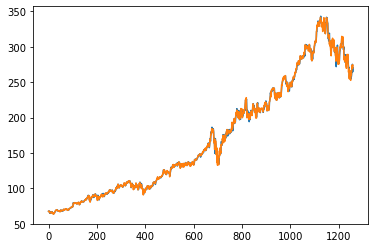

In [5]:
plt.plot(bot.stock_data['Open'])
plt.plot(bot.stock_data['Close'])

In [6]:
bot.get_sma_(t=50)
bot.get_sma_(t=200)
bot.get_cma_()
bot.get_ema_(t=50)
bot.get_ema_(t=200)

Got 50 day SMA.
Got 200 day SMA.
Got  CMA.
Got 50 day EMA.
Got 200 day EMA.


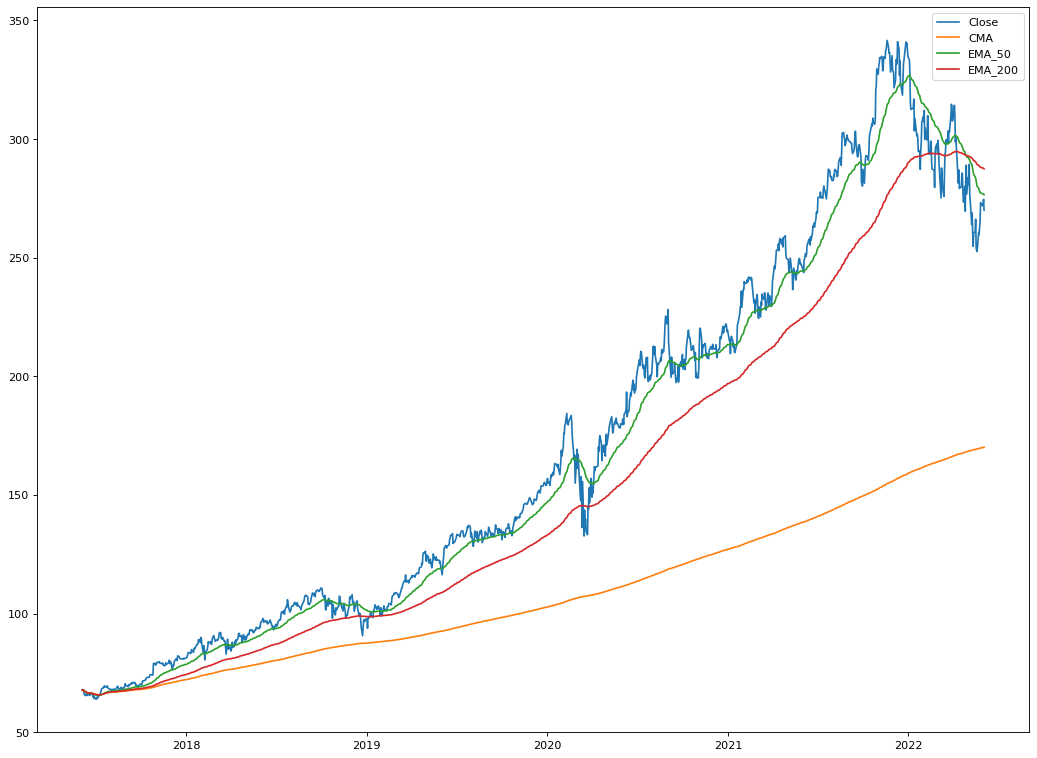

In [7]:
plt.figure(figsize=(16, 12), dpi=80)
cols_to_plot = ['Close', 'CMA', 'EMA_50','EMA_200']
for col in cols_to_plot:
    plt.plot( bot.stock_data['Date'], bot.stock_data[col], label=col)
plt.legend()

In [8]:
#price_hist.index[0] + pd.Timedelta(days=1)

In [9]:
test_pair = MA_pair('SMA', 50, 200)

In [10]:
bot.get_xs_(test_pair, 'DOWN')

Getting X_SMA_50_200_DOWN intersects
I already have 50 day SMA.
I already have 200 day SMA.


In [11]:
bot.get_xs_(MA_pair('EMA', 50, 200), 'DOWN')
bot.get_xs_(MA_pair('EMA', 20, 50), 'DOWN')
bot.get_xs_(MA_pair('EMA', 10, 50), 'DOWN')
bot.get_xs_(MA_pair('EMA', 50, 200), 'UP')
bot.get_xs_(MA_pair('EMA', 20, 50), 'UP')
bot.get_xs_(MA_pair('EMA', 10, 50), 'UP')

Getting X_EMA_50_200_DOWN intersects
I already have 50 day EMA.
I already have 200 day EMA.
Getting X_EMA_20_50_DOWN intersects
Got 20 day EMA.
I already have 50 day EMA.
Getting X_EMA_10_50_DOWN intersects
Got 10 day EMA.
I already have 50 day EMA.
Getting X_EMA_50_200_UP intersects
I already have 50 day EMA.
I already have 200 day EMA.
Getting X_EMA_20_50_UP intersects
I already have 20 day EMA.
I already have 50 day EMA.
Getting X_EMA_10_50_UP intersects
I already have 10 day EMA.
I already have 50 day EMA.


In [14]:
df = bot.ma_xs

In [17]:
df = df.sort_values(by=['Date'])

#### Correctly shows the downward interections

### Long-term

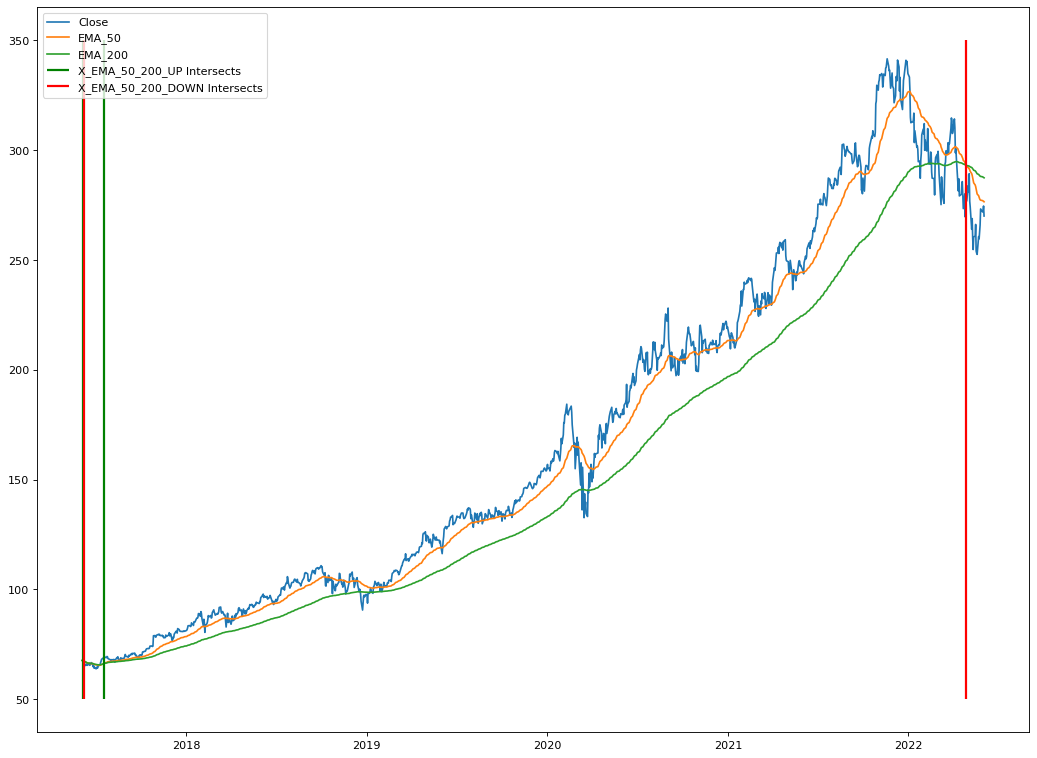

In [18]:
plt.figure(figsize=(16, 12), dpi=80)
cols_to_plot = ['Close','EMA_50', 'EMA_200']
xs_to_plot = ['X_EMA_50_200_UP','X_EMA_50_200_DOWN']
colors = ['red', 'orange', 'purple', 'blue']
for col in cols_to_plot:
    plt.plot(bot.stock_data['Date'], bot.stock_data[col], label=col)
for xs in xs_to_plot:
    ls = '--'
    color = 'red'
    arr_x = [df[df['name']==xs].iloc[idx]['Date'] for idx in range(len(df[df['name']==xs]))]
    if '200' in xs:
        ls = '-'
    if 'UP' in xs:
        color = 'green'
    plt.vlines(x=arr_x, ymin=50, ymax=350, colors=color, ls=ls, lw=2, label=f'{xs} Intersects')
plt.legend()

### Short-term

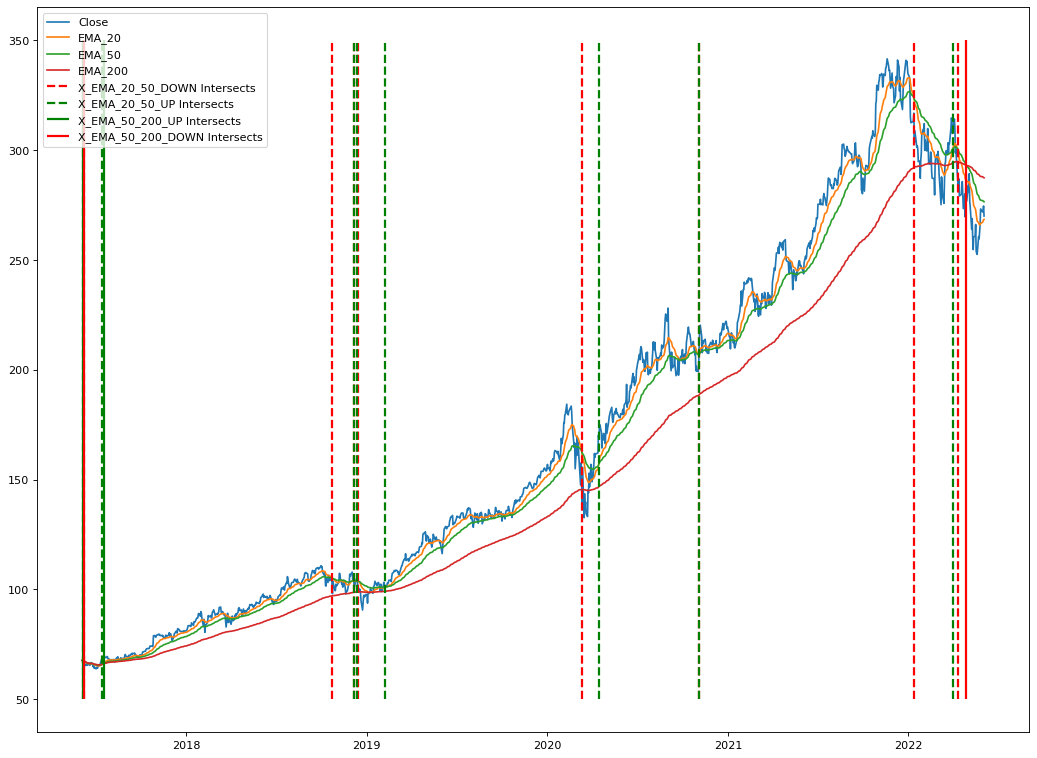

In [19]:
plt.figure(figsize=(16, 12), dpi=80)
cols_to_plot = ['Close', 'EMA_20', 'EMA_50', 'EMA_200']
xs_to_plot = [ 'X_EMA_20_50_DOWN', 'X_EMA_20_50_UP', 'X_EMA_50_200_UP','X_EMA_50_200_DOWN']
colors = ['red', 'orange', 'purple', 'blue']
for col in cols_to_plot:
    plt.plot(bot.stock_data['Date'], bot.stock_data[col], label=col)
for xs in xs_to_plot:
    ls = '--'
    color = 'red'
    arr_x = [df[df['name']==xs].iloc[idx]['Date'] for idx in range(len(df[df['name']==xs]))]
    if '200' in xs:
        ls = '-'
    if 'UP' in xs:
        color = 'green'
    plt.vlines(x=arr_x, ymin=50, ymax=350, colors=color, ls=ls, lw=2, label=f'{xs} Intersects')
plt.legend()

### SMA logic

Red dashed lines are 50_x_200, purple are 10_x_50
From the graph above we can think of some rules:
1. Purple line means that the stock will be dropping for one day, stock is dropping in the short-term
2. Iff the red line is recently preceded by a purple line, that means the stock will be dropping in the long term (i.e. the lines near 2021-12, the purple lines shows short-term movement and if followed by the red line that short-term movement turns into long-term movement)

In [77]:
bot.cleanup_ma_xs()

In [78]:
bot.predict_with_xs()

Getting X_EMA_50_200_DOWN intersects
I already have 50 day EMA.
I already have 200 day EMA.
Getting X_EMA_50_200_UP intersects
I already have 50 day EMA.
I already have 200 day EMA.
Getting X_EMA_20_50_DOWN intersects
I already have 20 day EMA.
I already have 50 day EMA.
Getting X_EMA_20_50_UP intersects
I already have 20 day EMA.
I already have 50 day EMA.
Getting X_EMA_10_50_DOWN intersects
I already have 10 day EMA.
I already have 50 day EMA.
Getting X_EMA_10_50_UP intersects
I already have 10 day EMA.
I already have 50 day EMA.
Signal.strong_sell SignalTerm.long_term
